In [122]:
import numpy as np
import matplotlib.pyplot as plt


# Creating the 'x' and 'y' values using numpy random function.

In [123]:
x = np.random.randint(0,10,40)
x

array([7, 9, 4, 0, 3, 5, 4, 4, 8, 2, 3, 7, 7, 1, 0, 5, 3, 0, 8, 2, 3, 6,
       1, 3, 2, 4, 8, 4, 1, 2, 5, 4, 8, 2, 2, 3, 0, 4, 5, 0])

## Now building 'y' values based on 'x' values using slope-m and intercept-c .                        Here we will assume slope to be 5 and intercept to be 7 



In [124]:
m = 5
c = 7

# Eqaution for linear data is y=mx + c  or y = m1x1 + m2x2 + m3x3 + m0

In [125]:
y= (m*x) + c
y

array([42, 52, 27,  7, 22, 32, 27, 27, 47, 17, 22, 42, 42, 12,  7, 32, 22,
        7, 47, 17, 22, 37, 12, 22, 17, 27, 47, 27, 12, 17, 32, 27, 47, 17,
       17, 22,  7, 27, 32,  7])

# Now we will see how the line is displyed using matplotlib.pyplot

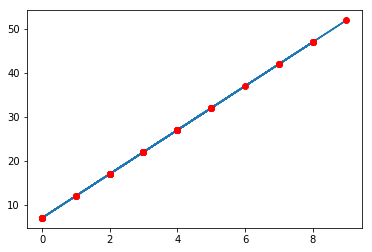

In [126]:
plt.plot(x,y)
plt.plot(x,y,'ro')

# Since the data points are very perfect ,we try to add some noise to make it look natural.

# So forming new y with noise.

# Here we use noise to show the line is not perfect and we are trying to fit the best one rather than perfect one.

In [127]:
new_y = m*(x+np.random.randint(-1,2,40)) + c

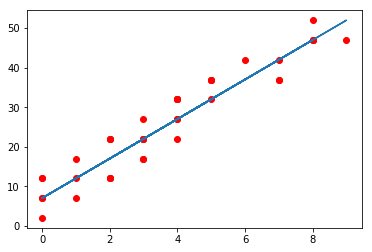

In [128]:
plt.plot(x,new_y,'ro')
plt.plot(x,y)

# '''In the above diagram we can see the values are scattered along the line.And now we will write a linear regression program which will fit the above points with minimum error.

# Now regarding everyone doubt , we are forgetting the slope and intercept we used.And trying to find the slope and intercept with minimum error using the linear regression

## Steps for linear regression using gradient descent
Step1: 
     We will assume random numbers for the slope and intercept.
     m = 8
     c=10
     
Step2:
     Find the new predicted y_pred value using the guessed slope-m and intercept-c
     y_pred = m * x + c
     
Step3:
    Find the error between the actual y and predicted y.
    Error = y_pred - y
    
    
    Find the total error between all the predicted y values to all y values.
    Error = (sigma(y_pred-y)^2)/(2*len(y))
    
    Subtract each y_pred with actual y and square them.
    Sum them and divide them by number of rows.
    
    This will give us the total error
   
Step4:
     We will be using gradient descent to find the new slope and intercept values which would give us less error.
     But here we need to know what is the error with respect to slope.
     So we differentiate the error equation with respect to slope-m.
     
     Error with respect to slope will be 
     new_slope = previous_slope -( learning_rate * (Error with slope))
     m = m - a*(((y_pred-y) x)  / len(y))
     
     new_intercept = previous_intercept  - (learning_rate *Error with intercept)
     c = c - a*((y_pred-y)/len(y))
Step5:
     Repeat theses steps from step 2 untill the below condition is satisfied and you can stop.
     
     
    Check if the change in slope and intercept values are changing less than 0.01 or the iterations have reached 100 , then stop iterating and consider these values are the best we can get.

# To make it look easy we will be using the data in form table for each equation and will watch the data changes as we go.

In [129]:
import pandas as pd

## This table will be having columns as 
Error

slope

intercept

change in slope

change in intercept

In [130]:
df = pd.DataFrame()
df['error']=[]
df['slope']=[]
df['intercept']=[]
df['chgSlp']=[]
df['chgInt']=[]
df

,error,slope,intercept,chgSlp,chgInt


## Here I will record values only after every 10 iterations.

# Step1:

In [131]:
# Random numbers for slope-m and intercept-c

m = np.random.randint(0,10,1)[0]
c = np.random.randint(0,10,1)[0]
print('m=',m,'c=',c)

m= 8 c= 0


## Step2:

In [132]:
#Find the y values with respect to the slope and intercept values using x.
def predict_y(x):
    y_pred = (m * x) + c
    return y_pred
y_pred = predict_y(x)
y_pred

array([56, 72, 32,  0, 24, 40, 32, 32, 64, 16, 24, 56, 56,  8,  0, 40, 24,
        0, 64, 16, 24, 48,  8, 24, 16, 32, 64, 32,  8, 16, 40, 32, 64, 16,
       16, 24,  0, 32, 40,  0])

## Step3

In [133]:
# Find the error between predicted y values and actual y values
def err(y_pred,y):
    error = sum((y_pred-y)*(y_pred-y))/(2*len(y))
    return error

mse = err(y_pred,new_y)
mse

    

44.925

Step4
## Error with respect to slope and intercept
And n

In [134]:
# new slope and intercept values
def new_m_c(a,m,c,x,y,y_pred):
    m = m - a*(sum((y_pred-y)*x)/len(y))
    c = c - a*(sum(y_pred-y)/len(y))
    return (m,c)

#alpha or learning rate,
a = 0.01
m_new,c_new = new_m_c(a,m,c,x,new_y,y_pred)

print(m_new,c_new)

7.66975 -0.0355


## Learning rate
We will be trying to move towards the right answer and everytime we are trying to reduce 1% of the error and this is what learning rate.

In [135]:
# find the difference betweeen the previous slope and current slope values.
def diffrnc(m1,c1,m2,c2):
    md = m1-m2
    cd = c1-c2
    if md < 0:
        md = md * -1
    if cd < 0:
        cd =cd * -1
    
    return (md,cd)

m_chg,c_chg = diffrnc(m,c,m_new,c_new)

print('change in m=',m_chg,'change in c=',c_chg) 

change in m= 0.3302500000000004 change in c= 0.0355


In [136]:
# Now we have to add these values into the pandas dataframe

df.loc[0]=[mse,m_new,c_new,m_chg,c_chg]
df

,error,slope,intercept,chgSlp,chgInt
0,44.925,7.66975,-0.0355,0.33025,0.0355


## Now we can iterate through these functions one after the other and find the slope and interecpt values.

8 0
0.003443330152323121 0.01850445808730239


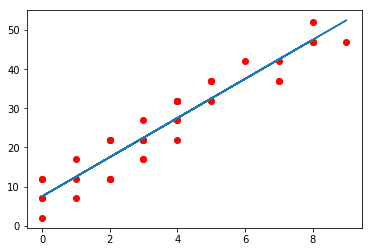

In [137]:
#Condition to stop the iterations is the number of
#iteration should be 100 or change in slope and intercept values should be less than 0.01
print(m,c)
for i in range(1000):
#     Step2:
    y_pred = predict_y(x)
#     Step3:
    mse = err(y_pred,new_y)
#     Step4:
    m_new,c_new = new_m_c(a,m,c,x,new_y,y_pred)
#     Step5:
    m_chg,c_chg = diffrnc(m,c,m_new,c_new)
    m,c = m_new,c_new
        
    if i%5 == 0:
        df.loc[len(df)] = [mse,m,c,m_chg,c_chg]
    if(m_chg < 0.001) and (c_chg < 0.001):
        print(i,m_chg,c_chg)
        break
    if i == 99:
        print(m_chg,c_chg)
df.loc[len(df)] = [mse,m,c,m_chg,c_chg]
plt.plot(x,new_y,'ro')
plt.plot(x,y_pred)

In [160]:
# Here we can see the line has fit the data points with least error
df.head()
#Remeber this is the only top five rows of the table

,error,slope,intercept,chgSlp,chgInt
0,44.925000,7.669750,-0.035500,0.330250,0.035500
1,44.925000,7.669750,-0.035500,0.330250,0.035500
2,20.978209,6.799191,-0.068918,0.104665,0.006081
3,18.435054,6.515958,0.004994,0.035283,0.018602
4,17.922306,6.413480,0.110610,0.013911,0.022196


## We can use this table to see the change in line slope and intercept

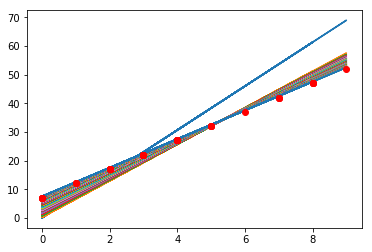

In [159]:

for i in df.iloc[::5,:].values:
    m = i[1]
    c = i[2]
    plt.plot(x,(m*x+c))

plt.plot(x,y,'ro')

